In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB # <--- QUAN TRỌNG: Import Gaussian Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Tắt các cảnh báo không quan trọng
warnings.filterwarnings('ignore')

# Cài đặt để Matplotlib hiển thị biểu đồ ngay trong notebook
%matplotlib inline

In [2]:
# --- Bước 1: Tải và Khám phá Dữ liệu ---
print("--- Bước 1: Tải và Khám phá Dữ liệu ---")
try:
    data = pd.read_csv('./data/Customer_Behaviour.csv')
    print("Tải dữ liệu 'Customer_Behaviour.csv' thành công!")
    
    print("\n5 dòng dữ liệu đầu tiên:")
    display(data.head())
    
    print("\nThông tin chung về dữ liệu:")
    data.info()
    
except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'Customer_Behaviour.csv'.")

--- Bước 1: Tải và Khám phá Dữ liệu ---
Tải dữ liệu 'Customer_Behaviour.csv' thành công!

5 dòng dữ liệu đầu tiên:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



Thông tin chung về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
# --- Bước 2: Tiền xử lý dữ liệu ---
print("--- Bước 2: Bắt đầu Tiền xử lý dữ liệu ---")

# Sao chép dữ liệu để xử lý
data_processed = data.copy()

# 1. Mã hóa biến 'Gender'
# Sử dụng LabelEncoder để chuyển 'Male' -> 1, 'Female' -> 0
encoder = LabelEncoder()
data_processed['Gender'] = encoder.fit_transform(data_processed['Gender'])
print("Đã mã hóa cột 'Gender' (ví dụ: Male=1, Female=0).")

# 2. Loại bỏ cột không cần thiết
# 'User ID' không phải là đặc trưng dự đoán
data_processed = data_processed.drop('User ID', axis=1)
print("Đã loại bỏ cột 'User ID'.")

print("\nDữ liệu sau khi tiền xử lý (5 dòng đầu):")
display(data_processed.head())

--- Bước 2: Bắt đầu Tiền xử lý dữ liệu ---
Đã mã hóa cột 'Gender' (ví dụ: Male=1, Female=0).
Đã loại bỏ cột 'User ID'.

Dữ liệu sau khi tiền xử lý (5 dòng đầu):


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [4]:
# --- Bước 3: Chuẩn bị dữ liệu (Train/Test Split) ---
print("\n--- Bước 3: Chuẩn bị dữ liệu (Train/Test Split) ---")

# Tách X (đặc trưng) và y (mục tiêu)
X = data_processed.drop('Purchased', axis=1)
y = data_processed['Purchased']

# Chia dữ liệu (80% train, 20% test)
# (Giống Nhiệm vụ 1, bước 2 trong tài liệu)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập huấn luyện (X_train): {X_train.shape}")
print(f"Kích thước tập kiểm tra (X_test): {X_test.shape}")


--- Bước 3: Chuẩn bị dữ liệu (Train/Test Split) ---
Kích thước tập huấn luyện (X_train): (320, 3)
Kích thước tập kiểm tra (X_test): (80, 3)


In [5]:
# --- Bước 4: Chuẩn hóa dữ liệu (Scaling) ---
# GaussianNB giả định dữ liệu tuân theo phân phối Gaussian (chuẩn).
# Việc chuẩn hóa 'Age' và 'EstimatedSalary' là cần thiết.
print("\n--- Bước 4: Chuẩn hóa dữ liệu ---")

scaler = StandardScaler()

# Fit scaler CHỈ trên X_train
scaler.fit(X_train)

# Transform cả X_train và X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Đã chuẩn hóa dữ liệu train và test.")
print("Dữ liệu X_train sau khi chuẩn hóa (5 dòng đầu):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


--- Bước 4: Chuẩn hóa dữ liệu ---
Đã chuẩn hóa dữ liệu train và test.
Dữ liệu X_train sau khi chuẩn hóa (5 dòng đầu):
   Gender       Age  EstimatedSalary
0    -1.0 -1.066752        -0.386344
1     1.0  0.797535        -1.229939
2    -1.0  0.110692         1.853544
3    -1.0  0.601294        -0.909955
4    -1.0  1.876859        -1.288118


In [6]:
# --- Bước 5: Xây dựng và Huấn luyện mô hình Naive Bayes ---
print("\n--- Bước 5: Xây dựng và Huấn luyện mô hình ---")

# 1. Khởi tạo mô hình Gaussian Naive Bayes
# (Giống Nhiệm vụ 1, bước 4 trong tài liệu)
classifier = GaussianNB()

print("Đang huấn luyện mô hình GaussianNB...")
# 2. Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
classifier.fit(X_train_scaled, y_train)

print("Huấn luyện hoàn tất.")


--- Bước 5: Xây dựng và Huấn luyện mô hình ---
Đang huấn luyện mô hình GaussianNB...
Huấn luyện hoàn tất.



--- Bước 6: Đánh giá mô hình trên tập Test ---
Accuracy: 0.9375

Báo cáo phân loại (Classification Report):
                   precision    recall  f1-score   support

Not Purchased (0)       0.94      0.96      0.95        52
    Purchased (1)       0.93      0.89      0.91        28

         accuracy                           0.94        80
        macro avg       0.93      0.93      0.93        80
     weighted avg       0.94      0.94      0.94        80


Ma trận nhầm lẫn (Confusion Matrix):


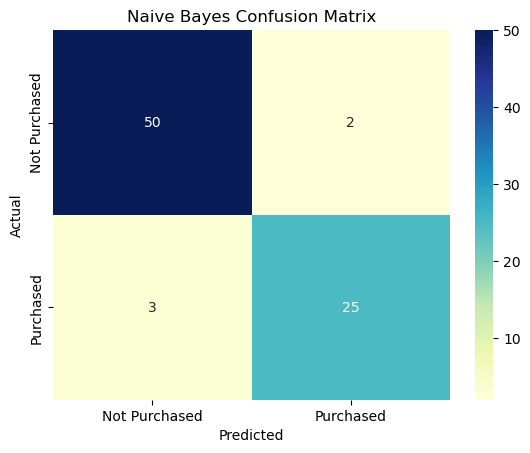

In [7]:
# --- Bước 6: Đánh giá mô hình Naive Bayes ---
print("\n--- Bước 6: Đánh giá mô hình trên tập Test ---")

# 1. Dự đoán trên tập X_test đã chuẩn hóa
# (Giống Nhiệm vụ 1, bước 5 trong tài liệu)
y_pred = classifier.predict(X_test_scaled)

# 2. Đánh giá Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. In Báo cáo phân loại (Classification Report)
# (Giống Hình 2.7 trong tài liệu)
print("\nBáo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred, target_names=['Not Purchased (0)', 'Purchased (1)']))

# 4. Vẽ Ma trận nhầm lẫn (Confusion Matrix)
# (Giống Hình 2.5)
print("\nMa trận nhầm lẫn (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['Not Purchased', 'Purchased'], 
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()